<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-393 Máquinas de Aprendizaje II-2018 </h1>

<H3 align='center'> Tarea 1 - Introducción a Máquinas de Aprendizaje </H3>
<hr style="height:2px;border:none"/>
<H3 align='center'> Ignacio Pinedo </H3>

## 2. Análisis de audios como datos brutos

In [1]:
from scipy.io import wavfile
def clean_filename(fname, string):
    file_name = fname.split('/')[1]
    if file_name[:2] == '__':
        file_name = string + file_name
    return file_name
SAMPLE_RATE = 44100
def load_wav_file(name, path):
    s, b = wavfile.read(path + name)
    assert s == SAMPLE_RATE
    return b


>a) Construya un dataframe con los datos a analizar. Describa el dataset y determine cuántos registros hay por clase.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('heartbeat-sounds/set_a.csv')

print(df.shape,"\n")
print(df.head(),"\n")

print(df['label'].value_counts())

(176, 4) 

  dataset                             fname     label  sublabel
0       a  set_a/artifact__201012172012.wav  artifact       NaN
1       a  set_a/artifact__201105040918.wav  artifact       NaN
2       a  set_a/artifact__201105041959.wav  artifact       NaN
3       a  set_a/artifact__201105051017.wav  artifact       NaN
4       a  set_a/artifact__201105060108.wav  artifact       NaN 

artifact    40
murmur      34
normal      31
extrahls    19
Name: label, dtype: int64


Hay 176 datos en total, 40 "artifact", 34 "murmurs", 31 "normal", 19 "extrahls".

>b) Lea los archivos .wav y transformelos en secuencias de tiempo. Realice un padding de ceros al final de cada secuencia para que todas queden representadas con la misma cantidad de elementos, explique la importancia de realizar este paso.

In [3]:
def padd_zeros(array,length):
    aux = np.zeros(length)
    aux[:array.shape[0]] = array
    return aux
new_df =pd.DataFrame({'file_name' : df['fname'].apply(clean_filename,string='Aunlabelledtest')})

new_df['time_series'] = new_df['file_name'].apply(load_wav_file, path='heartbeat-sounds/')
new_df['len_series'] = new_df['time_series'].apply(len)
new_df['time_series']=new_df['time_series'].apply(padd_zeros,length=max(new_df['len_series']))
print(new_df.head())

                    file_name  \
0  artifact__201012172012.wav   
1  artifact__201105040918.wav   
2  artifact__201105041959.wav   
3  artifact__201105051017.wav   
4  artifact__201105060108.wav   

                                         time_series  len_series  
0  [1.0, -3.0, -1.0, -7.0, -9.0, -2.0, -6.0, -5.0...      396900  
1  [-2.0, 3.0, -4.0, 4.0, -3.0, 2.0, -1.0, 0.0, 0...      396900  
2  [6.0, -4.0, -9.0, -1.0, -4.0, 1.0, -5.0, 2.0, ...      396900  
3  [-85.0, -198.0, -214.0, -173.0, -177.0, -206.0...      396900  
4  [53.0, -35.0, 47.0, 170.0, 340.0, 436.0, 535.0...      396900  


El padding es necesario ya que los metodos utilizados asumen un comportamiento vectorial de los datos, si hay datos de distinto largo no se puede operar vectorialmente sobre estos.


>c) Manipule los datos y cambie las etiquetas de los audios por otras asignadas por un doctor experto [4], el cual afirma que estos cambios son requeridos. Vuelva a determinar cuántos registros hay por clase. Nótese que ahora son 3 clases ¿Explique la problemática de tener etiquetas mal asignadas en los datos? ¿Un solo dato puede afectar esto?

In [4]:
new_labels = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 0, 2, 2, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
labels = ['artifact','normal/extrahls', 'murmur']
new_df['target'] = [labels[i] for i in new_labels]
print(new_df['target'].value_counts())

normal/extrahls    65
artifact           58
murmur             53
Name: target, dtype: int64


De los 176 datos, hay 65 en "normal/extrahls", 58 en "artifact", 53 en "murmur".
Si se tienen etiquetas mal asignadas, los datos afectan negativamente el analisis, generando un ruido que empeora los resultados. Sin embargo, este daño solo ocurre si hay una cantidad importante de datos mas rotulados, es decir, un solo dato erroneo no afecta.

>d) Codifique las distintas clases a valores numéricos para que puedan ser trabajados por los algoritmos clasificadores.

In [5]:
new_df["target"] = new_df["target"].astype('category')
cat_columns = new_df.select_dtypes(['category']).columns
new_df[cat_columns] = new_df[cat_columns].apply(lambda x: x.cat.codes)

>e) Desordene los datos, evitando ası́ el orden en el que vienen la gran mayorı́a de las etiquetas. Cree la matriz que conforma a los datos en sus dimensiones sin preprocesar, es decir, cada ejemplo es una secuencia de amplitudes en el tiempo. ¿Las dimensiones de ésta indica que puede generar problemas? ¿De qué tipo?

(176, 396900)


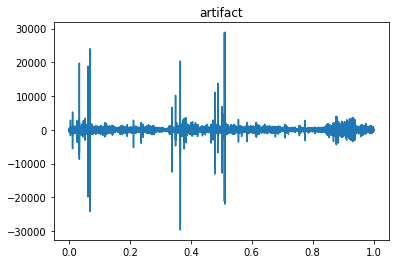

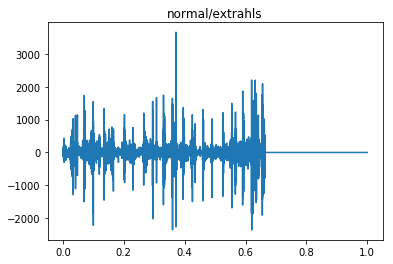

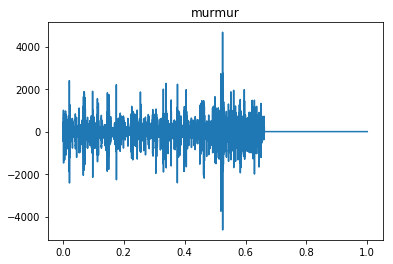

In [6]:
new_df = new_df.sample(frac=1,random_state=44)
X = np.stack(new_df['time_series'].values, axis=0)
y = new_df.target.values
print(X.shape)
a=list(y).index(0)
b=list(y).index(1)
c=list(y).index(2)

plt.plot(np.linspace(0,1,num=len(X[a])),X[a])
plt.title("artifact")
plt.show()

plt.plot(np.linspace(0,1,num=len(X[b])),X[b])
plt.title("normal/extrahls")
plt.show()

plt.plot(np.linspace(0,1,num=len(X[c])),X[c])
plt.title("murmur")
plt.show()



La dimension de los datos es de 396900, extremadamente alta, esto tiene el efecto de la "maldicion de la dimensionalidad", uno de los efectos es necesitar una cantidad extremadamente grande de datos para entrenar modelos y que los datos se dejen de parecer.

>f) Para pre-procesar la secuencia en el tiempo realice una transformada de fourier discreta [5] para pasar los datos desde el dominio de tiempos al dominio de frecuencias presentes en la señal de sonido. Visualice el cambio de representación.

(176, 396900)


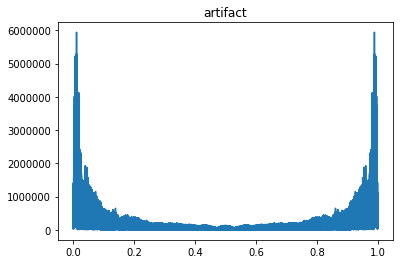

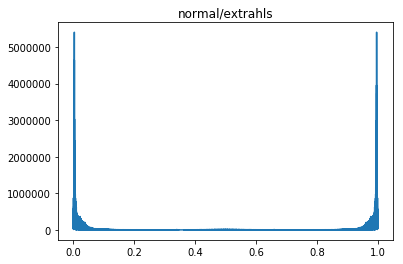

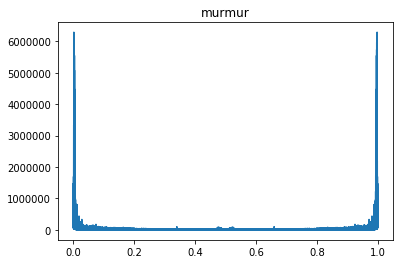

In [7]:
X_fourier = np.abs(np.fft.fft(X))
print(X_fourier.shape)

plt.plot(np.linspace(0,1,num=len(X_fourier[a])),X_fourier[a])
plt.title("artifact")
plt.show()

plt.plot(np.linspace(0,1,num=len(X_fourier[b])),X_fourier[b])
plt.title("normal/extrahls")
plt.show()

plt.plot(np.linspace(0,1,num=len(X_fourier[c])),X_fourier[c])
plt.title("murmur")
plt.show()




>g) Para seguir con el pre-procesamiento realice un muestreo representativo de los datos a través de una técnica de muestreo especializada en secuencias ¿En qué beneficia este paso? ¿Cómo podrı́a determinar si el muestro es representativo?

(176, 100000)


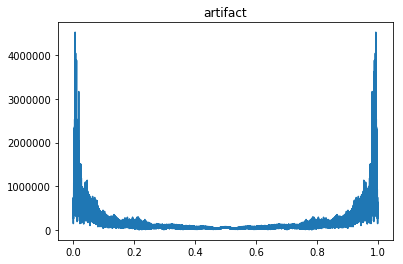

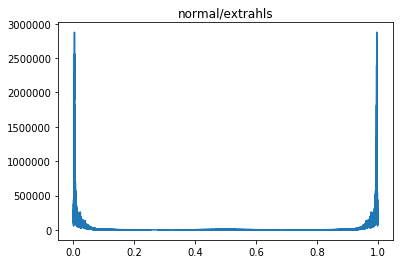

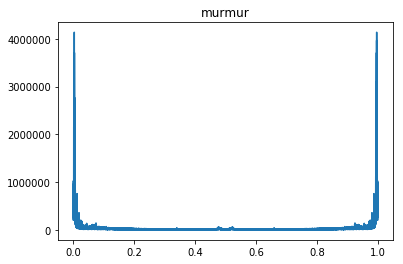

In [8]:
from scipy import signal
X_resampled = []
for i in range(X_fourier.shape[0]):
    sequence = X_fourier[i,:].copy()
    resampled_sequence = signal.resample(sequence, 100000)
    X_resampled.append(resampled_sequence)
X_resampled = np.array(X_resampled)
print(X_resampled.shape)
plt.plot(np.linspace(0,1,num=len(X_resampled[a])),X_resampled[a])
plt.title("artifact")
plt.show()

plt.plot(np.linspace(0,1,num=len(X_resampled[b])),X_resampled[b])
plt.title("normal/extrahls")
plt.show()

plt.plot(np.linspace(0,1,num=len(X_resampled[c])),X_resampled[c])
plt.title("murmur")
plt.show()


Resample reduce el sample rate de los datos, de 396900 a 100000, asi se reduce la dimension de estos.

>h) Debido a que no hay conjunto de pruebas, y que es necesario para evaluar la calidad final del modelo, genérelo a través de la técnica hold-out

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y, test_size=0.25, random_state=42)

>i) Realice un proceso de estándarizar los datos para ser trabajados adecuadamente. Recuerde que solo se debe ajustar (calcular media y desviación estándar) con el conjunto de entrenamiento.

In [10]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler(with_mean=True, with_std=True)
std.fit(X_train)
X_train = std.transform(X_train)
X_test = std.transform(X_test)

>j) Realice una reducción de dimensionalidad a través de la técnica PCA, para representar los datos en d=2 dimensiones. Recuerde que solo se debe ajustar (encontrar las componentes principales) con el conjunto de entrenamiento. Visualice apropiadamente la proyección en 2 dimensiones.

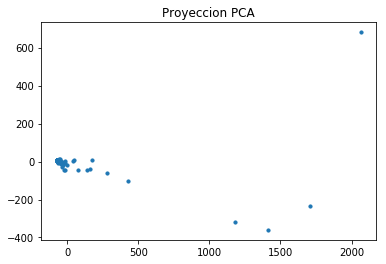

In [11]:
from sklearn.decomposition import PCA
pca_model = PCA(n_components=2)
pca_model.fit(X_train)
X_pca_train = pca_model.transform(X_train)
X_pca_test = pca_model.transform(X_test)

x_val = [x[0] for x in X_pca_train]
y_val = [x[1] for x in X_pca_train]
plt.title("Proyeccion PCA")

plt.scatter(x_val ,y_val,s=10 )

Se aprecia 1 cluster y unos puntos outliers.

>k) Entrene un modelo de Regresión Logı́stica variando el parámetro de regularización C construyendo un gráfico resumen del error en función de este hiper-parámetro. Además entrene un Perceptrón, variando el hiper-parámetro de regularización αα en el rango inverso que para la Regresión Logı́stica ¿Por qué? Contruya el mismo gráfico resumen, en función de C o α. Compare y comente lo observado.

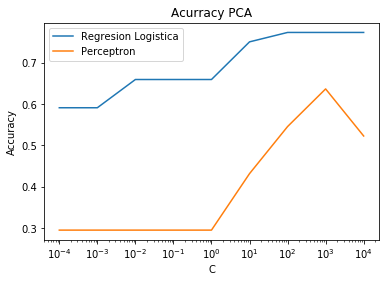

In [20]:
Cs = [0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
acc_log=[]
acc_perc=[]
from sklearn.linear_model import Perceptron,LogisticRegression
for c in Cs:
    LogR= LogisticRegression(penalty='l2', C=c,max_iter=200)
    LogR.fit(X_pca_train,y_train)
    acc_log.append(LogR.score(X_pca_test, y_test))
    
    Perc = Perceptron(penalty='l2', alpha=1/c, max_iter=200)
    Perc.fit(X_pca_train,y_train)
    acc_perc.append(Perc.score(X_pca_test, y_test))
ax = plt.gca()
ax.set_xscale('log')
plt.xlabel("C")    
plt.ylabel("Accuracy")
plt.title("Acurracy PCA")
plt.plot(Cs,acc_log, label='Regresion Logistica')
plt.plot(Cs,acc_perc, label='Perceptron')
plt.legend(loc="best")

C tiene que ser el reciproco de alfa ya que los modelos estan implementados asi en la libreria sklearn.

Se aprecia que la regresion logistica siempre obtiene mejores resultados que el perceptron, por otro lado, hay un caracter creciente al variar C (o decreciente al variar alfa).

>l) Genere otra representación de los datos a través de la técnica de reducción de dimensionalidad ICA, con dimensionalidad d=2. Recuerde que sólo se debe ajustar con el conjunto de entrenamiento, si se muestra un warning explique el porqué. Visualice apropiadamente la proyección en 2 dimensiones. Vuelva a realizar el item k) pero para esta nueva representación.

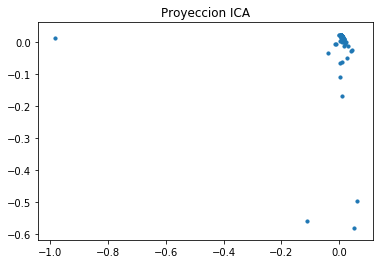

In [13]:
from sklearn.decomposition import FastICA
ica_model = FastICA(n_components=2)
ica_model.fit(X_train)
X_ica_train = ica_model.transform(X_train)
X_ica_test = ica_model.transform(X_test)

x_val = [x[0] for x in X_ica_train]
y_val = [x[1] for x in X_ica_train]
plt.title("Proyeccion ICA")
plt.scatter(x_val ,y_val, s=10 )

Al igual que antes, se aprecian 1 cluster y unos puntos outliers

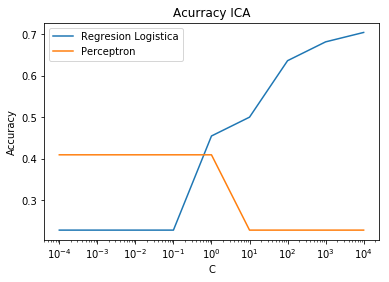

In [19]:
Cs = [0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
acc_log=[]
acc_perc=[]
from sklearn.linear_model import Perceptron,LogisticRegression
for c in Cs:
    LogR= LogisticRegression(penalty='l2', C=c,max_iter=200)
    LogR.fit(X_ica_train,y_train)
    acc_log.append(LogR.score(X_ica_test, y_test))
    
    Perc = Perceptron(penalty='l2', alpha=1/c, max_iter=200)
    Perc.fit(X_pca_train,y_train)
    acc_perc.append(Perc.score(X_ica_test, y_test))
ax = plt.gca()
ax.set_xscale('log')
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.title("Acurracy ICA")
plt.plot(Cs,acc_log, label='Regresion Logistica')
plt.plot(Cs,acc_perc, label='Perceptron')
plt.legend(loc="best")


La regresion logistica nuevamente supera al perceptron.

>m) Experimente con diferentes dimensiones dd para la proyección de PCA e ICA con el propósito de obtener un modelo con menor error. Construya una tabla o gráfico resumen de los errores o accuracy, comente.

           C    alfa
2     0.0001  0.1000
3   100.0000  0.1000
4    10.0000  0.0001
5   100.0000  0.0001
6   100.0000  0.0001
7   100.0000  0.0100
8  1000.0000  0.0001
9   100.0000  0.0010


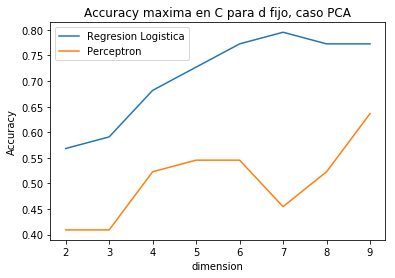

In [15]:
Cs = [0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
acc_log=[]
acc_perc=[]
bestC=[]
bestAlfa=[]
ds=range(2,10)

for d in ds:
    acc_log_iter=[]
    acc_perc_iter=[]
    for c in Cs:
        pca_model = PCA(n_components=d)
        pca_model.fit(X_train)
        X_pca_train = pca_model.transform(X_train)
        X_pca_test = pca_model.transform(X_test)

    
        LogR= LogisticRegression(penalty='l2', C=c,max_iter=200)
        LogR.fit(X_pca_train,y_train)
        acc_log_iter.append(LogR.score(X_pca_test, y_test))

        Perc = Perceptron(penalty='l2', alpha=1/c, max_iter=200)
        Perc.fit(X_pca_train,y_train)
        acc_perc_iter.append(Perc.score(X_pca_test, y_test))
    bestC.append(Cs[acc_log_iter.index(max(acc_log_iter))])
    bestAlfa.append(1/Cs[acc_perc_iter.index(max(acc_perc_iter))])
    acc_log.append(max(acc_log_iter))
    acc_perc.append(max(acc_perc_iter))
plt.title("Accuracy maxima en C para d fijo, caso PCA")
plt.xlabel("dimension")
plt.ylabel("Accuracy")
plt.plot(ds,acc_log, label='Regresion Logistica')
plt.plot(ds,acc_perc, label='Perceptron')
plt.legend(loc="best")

results=pd.DataFrame(data= {"C":bestC,"alfa":bestAlfa},index=ds)
print(results)

       C    alfa
2     10  0.0001
3  10000  0.0100
4  10000  0.1000
5  10000  0.0010
6  10000  0.0100
7  10000  0.0100
8   1000  0.0100
9  10000  0.0001


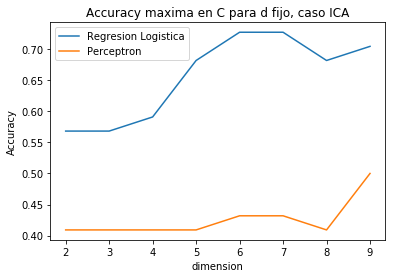

In [16]:
Cs = [0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
acc_log=[]
acc_perc=[]
bestC=[]
bestAlfa=[]
ds=range(2,10)

for d in ds:
    acc_log_iter=[]
    acc_perc_iter=[]
    for c in Cs:
        ica_model = FastICA(n_components=d)
        ica_model.fit(X_train)
        X_ica_train = ica_model.transform(X_train)
        X_ica_test = ica_model.transform(X_test)

    
        LogR= LogisticRegression(penalty='l2', C=c,max_iter=200)
        LogR.fit(X_ica_train,y_train)
        acc_log_iter.append(LogR.score(X_ica_test, y_test))

        Perc = Perceptron(penalty='l2', alpha=1/c, max_iter=200)
        Perc.fit(X_ica_train,y_train)
        acc_perc_iter.append(Perc.score(X_ica_test, y_test))
        
    bestC.append(Cs[acc_log_iter.index(max(acc_log_iter))])
    bestAlfa.append(1/Cs[acc_perc_iter.index(max(acc_perc_iter))])
    acc_log.append(max(acc_log_iter))
    acc_perc.append(max(acc_perc_iter))
plt.title("Accuracy maxima en C para d fijo, caso ICA")
plt.xlabel("dimension")
plt.ylabel("Accuracy")
plt.plot(ds,acc_log, label='Regresion Logistica')
plt.plot(ds,acc_perc, label='Perceptron')
plt.legend(loc="best")

results=pd.DataFrame(data= {"C":bestC,"alfa":bestAlfa},index=ds)
print(results)

Los graficos muestran el mejor accuracy obtenido en un d, variando el C, es decir, el mejor resultado posible en d fijo. 
Al igual que antes, la regresion logistica obtiene mejores resultados que el perceptron. Respecto a la dimension, hay mejores resultado para mayores d ya que hay menos informacion perdida, sin embargo hay una cierto limite para d=5. Respecto a las penalizaciones, los mejores resultados son para C=10000 y alfa=0.0001 en general.

>n) Realice otra reducción de dimensionalidad ahora a través de la técnica LDA, para representar los datos en d=2 dimensiones. Recuerde que sólo se debe ajustar con el conjunto de entrenamiento, si se muestra un warning explique el porqué. Visualice apropiadamente la proyección en 2 dimensiones.

C:\Users\Ignacio\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


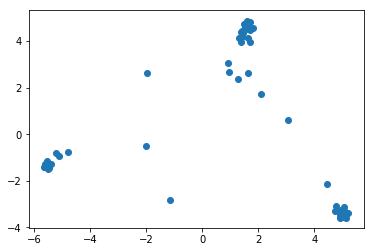

In [17]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda_model = LDA(n_components=2)
lda_model.fit(X_train,y_train)
X_lda_train = lda_model.transform(X_train)
X_lda_test = lda_model.transform(X_test)

x_val = [x[0] for x in X_lda_train]
y_val = [x[1] for x in X_lda_train]



plt.scatter(x_val ,y_val )

Claramente hay 3 clusters, los que se esperan sean las 3 etiquetas de los datos. Y la reduccion genera un warning ya que los datos son linealmente dependientes y el metodo calcula un determinante, este se va a cero por la dependencia lineal.

o) Con el propósito de encontrar el mejor modelo vuelva a realizar el item k) en el nuevo espacio generado por la representación según las dd dimensiones de la proyección LDA. Esta nueva representación ¿mejora o empeora el desempeño? Explique

C:\Users\Ignacio\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


        C  alfa
2  0.0001   0.1
3  0.0001   0.1
4  0.0001   0.1
5  0.0001   0.1
6  0.0001   0.1
7  0.0001   0.1
8  0.0001   0.1
9  0.0001   0.1


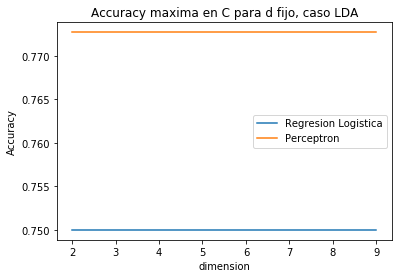

In [18]:
Cs = [0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
acc_log=[]
acc_perc=[]
bestC=[]
bestAlfa=[]
ds=range(2,10)

for d in ds:
    acc_log_iter=[]
    acc_perc_iter=[]
    for c in Cs:
        lda_model = LDA(n_components=d)
        lda_model.fit(X_train,y_train)
        X_lda_train = lda_model.transform(X_train)
        X_lda_test = lda_model.transform(X_test)

    
        LogR= LogisticRegression(penalty='l2', C=c,max_iter=200)
        LogR.fit(X_lda_train,y_train)
        acc_log_iter.append(LogR.score(X_lda_test, y_test))

        Perc = Perceptron(penalty='l2', alpha=1/c, max_iter=200)
        Perc.fit(X_lda_train,y_train)
        acc_perc_iter.append(Perc.score(X_lda_test, y_test))
        
    bestC.append(Cs[acc_log_iter.index(max(acc_log_iter))])
    bestAlfa.append(1/Cs[acc_perc_iter.index(max(acc_perc_iter))])
    acc_log.append(max(acc_log_iter))
    acc_perc.append(max(acc_perc_iter))
plt.title("Accuracy maxima en C para d fijo, caso LDA")
plt.xlabel("dimension")
plt.ylabel("Accuracy")
plt.plot(ds,acc_log, label='Regresion Logistica')
plt.plot(ds,acc_perc, label='Perceptron')
plt.legend(loc="best")

results=pd.DataFrame(data= {"C":bestC,"alfa":bestAlfa},index=ds)
print(results)

En contraste a los casos anteriorers, el pereceptron obtuvo mejores resultados que la regresion logistica, mas la diferencia es poca (77% y 75%). Lo interesante es ver que la dimension no afecta el resultado, esto da para teorizar que el metodo LDA no varia la informacion reducida para distintas dimensiones.

En resumen, comparando resultados, el mejor modelo fue con la regresion logistica reduciendo a d=9 utilizando ICA y penalizacion C=1000

>p) Intente mejorar el desempeño de los algoritmos ya entrenados. Diseñe ahora sus propias cracterı́sticas (feature crafting) a partir de los datos brutos (secuencia de amplitudes), puede inspirarse en otros trabajos [6], [7] si desea.